# Data Manipulation with Pandas for Beginners
### Hello, in this article I will explain data manipulation with Pandas, the Python library, as much as I can.

## So what is Pandas?
#### Pandas is an open source library used to analyze data in Python. It takes data such as a CSV or SQL database and creates an object with rows and columns called Dataframe. Pandas library is often called pd alias.

## The dataset I will use

### Features
* #: We can think of it as an index
* Name: Name of pokemon
* Type 1: 1st attack type
* Type 2: 2nd attack type
* HP: Pokemon hit points
* Attack: Pokemon attack force
* Defense: Pokemon defense points
* Sp. atk: Special attack force
* Sp. def: Special defense points
* Speed: Pokemon speed
* Generation: Development stage
* Legendary: Legendary status

#### Three files are available. The first one contains the Pokemon characteristics (the first column being the id of the Pokemon). The second one contains information about previous combats. The first two columns contain the ids of the combatants and the third one the id of the winner. Important: The Pokemon in the first columns attacks first.

# First Look at Data Set

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### The .csv files contained in read_csv must be written. (I'm writing the file pokemon.csv to "/kaggle/input/pokemon-challenge/pokemon.csv")

In [ ]:
df = pd.read_csv("/kaggle/input/pokemon-challenge/pokemon.csv")
df.head()

In [ ]:
df.info()

### Let's learn a little bit about our dataset with "df.info()".We have 12 variables, 3 of them are categorical variables, 9 of them are continuous variables, and we have missing data in our name and Type 2 variables.

In [ ]:
df.describe().T

### Let's look at the columns in the data set.

In [ ]:
df.columns

# Dtypes
* Sometimes a variable in your data set should be a numeric, but has been defined categorically or vice versa. Dtypes helps us solve this problem, that is, it briefly converts data types.
* But I will only show it as an example. I don't use.

In [ ]:
#df.Legendary = df.Legendary.astype("int") #For example

* Now I'll tell you about select_dtypes (). This function allows us to collect data types in the dataframe.
* Here we have collected our categorical variables in cat_df and our continuous variables in num_df dataframe.

In [ ]:
cat_df = df.select_dtypes(include = ["object"])
num_df = df.select_dtypes(include = ["int64"])

In [ ]:
cat_df["Type 1"].unique()

In [ ]:
cat_df["Type 1"].value_counts()

In [ ]:
cat_df.head(10)

In [ ]:
cat_df["Type 2"].unique()

In [ ]:
cat_df["Type 2"].value_counts()

In [ ]:
num_df.head(10)

# Drop
* We delete variables that will not affect our output in the data set. There is no such variable in our dataset, so I'll just make an example.(Actually the variables "#" and "Name" do not affect our output, but may be needed when analyzing.)

In [ ]:
#df.drop(["#","Name"], axis = 1 , inplace = True) 
#Here we have deleted "#" and "Name" variables, since the ones deleted with axis are columns, we made axis = 1. If we wanted to delete a row, axis = 0 should have been.

# Concat
* I have given column concatenation as an example. I will not implement it in this data set.

In [ ]:
#total = pd.concat(["Attack","Defense"] , Axis = 1)

# Adding New Features with Apply
* Here I have added new columns by customizing some of our continuous variables according to some criteria. I thought it would be more helpful in understanding the data set.

In [ ]:
HP_mean = df["HP"].mean()
HP_mean

In [ ]:
def HP_low_high(i):
    if i < HP_mean:
        return "HP_low"
    else:
        return "HP_high"

In [ ]:
df["HP_low_high"] = df["HP"].apply(HP_low_high)

* I divided the HP variable into HP_low and HP_high according to its average value and created the HP_low_high variable.

# Data visualization 
### I am referring to data visualization in this notebook.
#### Data visualization is about organizing complex and scattered data to make it easy to understand and interpret. In other words, data visualization is the task of concretizing the soft data we have by making it visual and obtaining preliminary information from it.

### I will use python's matplotlib and seaborn libraries for data visualization.

## Matplotlib
#### Matplotlib; The basic python library we use in data visualization. It allows us to make 2 and 3 dimensional drawings. While Matplotlib is generally used in 2D drawings, other libraries are used in 3D drawings.

## Seaborn
#### Built on Matplotlib, it is tightly integrated with the PyData stack, with support for statistical templates from numpy, pandas data structures, scipy, statsmodel.

#### I made the definition of these libraries at the beginning of the project.
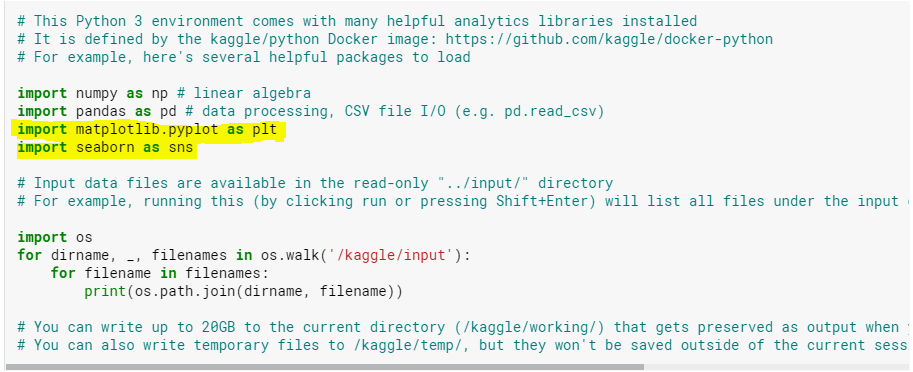

## Visualization of categorical variables

### Let's visualize now

In [ ]:
cat_df["Type 1"].value_counts().plot.barh();

* Pokemon's 1st attack ability is mostly water 2nd normal and 3rd grass

In [ ]:
cat_df["Type 2"].value_counts().plot.barh();

* Pokemon's 2nd attack ability is the most flying. Notice that flying ability was the least in 1st atack ability.

## Visualization of numeric variables
* I will write a short function and loop to examine numeric variables here.

In [ ]:
def numeric(variable):
    
    plt.hist(num_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} variable distribution".format(variable))
    plt.show()

In [ ]:
for i in num_df:
    
    numeric(i)
    

# Filter
* When using the filtering process, we first need to ask ourselves questions, this should be the most important feature of a data scientist when analyzing data. In the light of these questions we ask, we should be able to better understand the data set and the relationships between our variables.

* Generally, there are pokemon with hit points between 40 and 100 but more than 250 hit points,then let's see.

In [ ]:
df[(df["HP"] > 250)] 

* Let's look at the order of hit points, we use sort_values () for this.

In [ ]:
num_df["HP"].sort_values()

* There are Pokemon with 1 Health. let's see this

In [ ]:
df[(df["HP"] == 1)] 

* So let's have a look at the pokemons with the most atack power.

In [ ]:
df[(df["Attack"] > 175)]

* So let's have a look at the pokemons with the most defense power.

In [ ]:
df["Defense"].sort_values()

In [ ]:
df[(df["Defense"] == 230)]

* So let's have a look at the pokemons with the most speed.

In [ ]:
df["Speed"].sort_values()

In [ ]:
df[(df["Speed"] == 180)]

### Analysis and visualization of numerical variables

### Correlation analysis
* I create heatmap for correlation and write fmt = '.2f' for 2 digits after comma.

In [ ]:
df_corr = df.corr()
sns.heatmap(df_corr , annot = True , fmt= '.2f')

* Here we can understand the relationship between our continuous variables.I noticed that there is no negative relationship between variables

*  For example, there is a strong relationship between HP and Attack, I understood it from the correlation matrix.

In [ ]:
sns.jointplot("HP", "Attack", data = df, kind = "reg")

* As far as I can see from the graphic, the higher the hit point, the lower the attack power of the pokemon.

In [ ]:
sns.jointplot("Attack", "Defense", data = df, kind = "reg")

*  Except for some situations, the defense strength increases as the attack power increases.

## Groupby
* The groupby () function is used to sort data into groups based on some criteria. Pandas objects can be split on any axis.
* While implementing the Groupby process, we need to ask ourselves questions and look for answers to these questions.

In [ ]:
df.groupby(["Type 1"])["HP","Attack","Speed"].mean() #categorized variables and numerals are on different sides

* Dragon type Pokemon with the most Hit points and Attack power,Electric type pokemons with at least Hit points and Attack power and fastest pokemon flying type.

In [ ]:
df.groupby(["Type 1","HP_low_high"])["Attack","Speed"].mean()

* We used the HP_low_high variable, which is the new property we created in the Groupby process here. A different perspective

In [ ]:
df.groupby(["Type 2"])["Attack","Defense"].sum()

* With Groupby we can see the total

# General Information
* The most important thing a data scientist has to do is to ask herself questions and to analyze the relationship between variables in the light of these questions.



## So, in this article, I wanted to explain data manipulation with Pandas library as much as I can. I would appreciate it if you share your positive or negative opinions. Good work :)